In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/jessbreda/Desktop/github/jbreda_animal_training/code/training_performance')   

from DMS2_multiday_plots_utils import *
from DMS2_fetch_protocol_data import fetch_latest_trials_data
from dj_utils import return_date_window
# settings
%load_ext autoreload
%autoreload 2

sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [5]:
df_20 = fetch_latest_trials_data(
    animal_ids=None, 
    date_min=date_min, 
    date_max=date_max
)

df = fetch_latest_trials_data()

fetched 21 sessions for R610 between 2023-05-06 and 2023-05-26
fetched 21 sessions for R611 between 2023-05-06 and 2023-05-26
fetched 21 sessions for R612 between 2023-05-06 and 2023-05-26
fetched 21 sessions for R613 between 2023-05-06 and 2023-05-26
fetched 21 sessions for R614 between 2023-05-06 and 2023-05-26
fetched 41 sessions for R610 between 2023-04-13 and 2023-05-26
fetched 40 sessions for R611 between 2023-04-13 and 2023-05-26
fetched 41 sessions for R612 between 2023-04-13 and 2023-05-26
fetched 41 sessions for R613 between 2023-04-13 and 2023-05-26
fetched 41 sessions for R614 between 2023-04-13 and 2023-05-26


In [38]:
def plot_multianimal_multiday_perfs(data, *args, **kwargs):
    ax = plt.gca()  # Get the current axis
    animal_id = data["animal_id"].unique()[0]  # Get the animal_id for the current facet
    sub_df = df_20[df_20["animal_id"] == animal_id]  # Subset the DataFrame for the current animal_id
    plot_multiday_perfs(sub_df, ax, title=animal_id, legend=False)

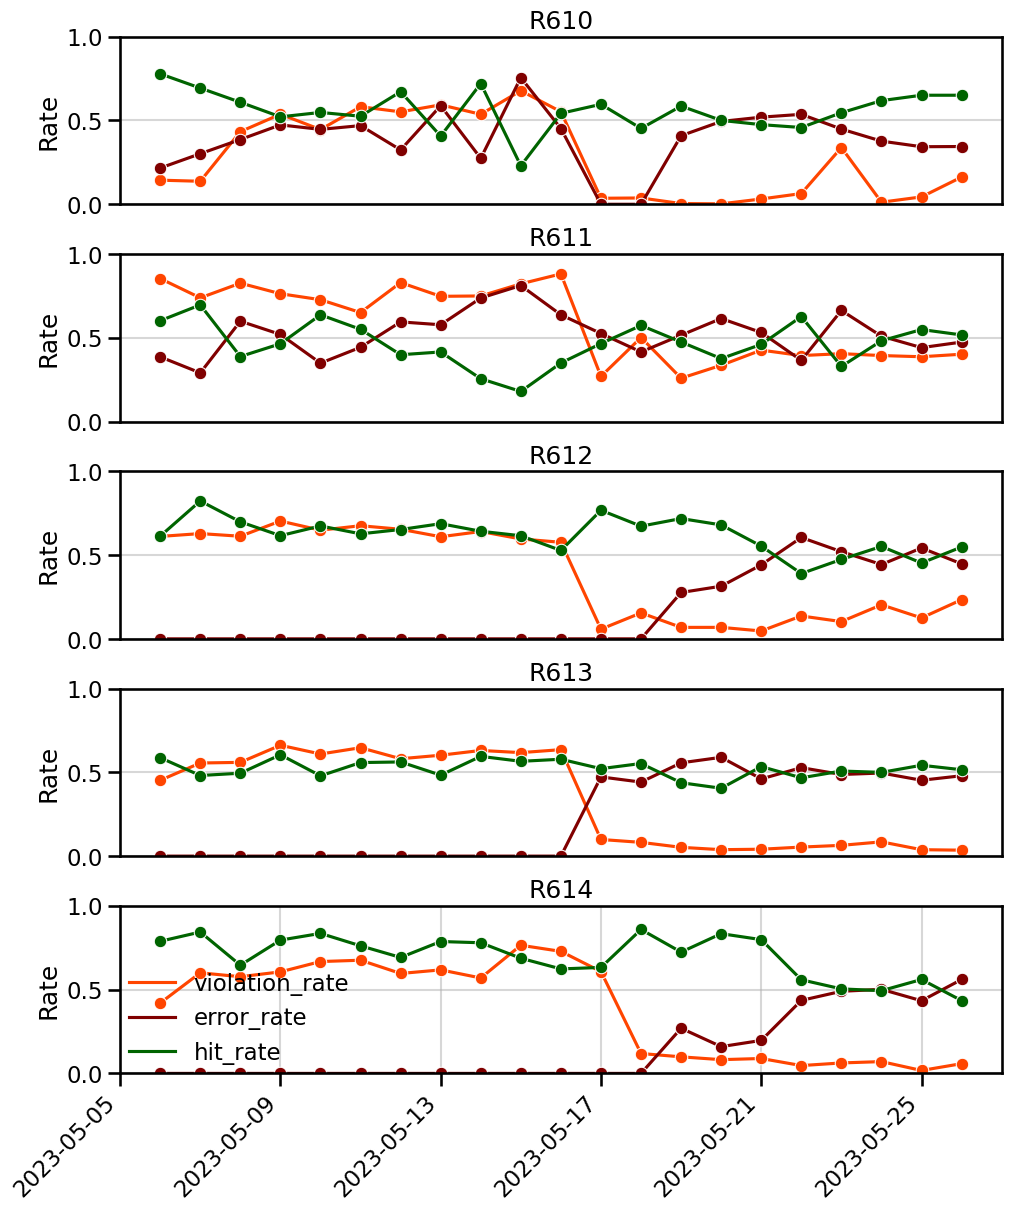

In [68]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True, sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df_20.groupby("animal_id")):
    legend = True if ii > 3 else False
    plot_multiday_perfs(sub_df, ax[ii], title=animal_id, legend=legend)
    ax[ii].set_xticks([], []) if ii < 4 else None

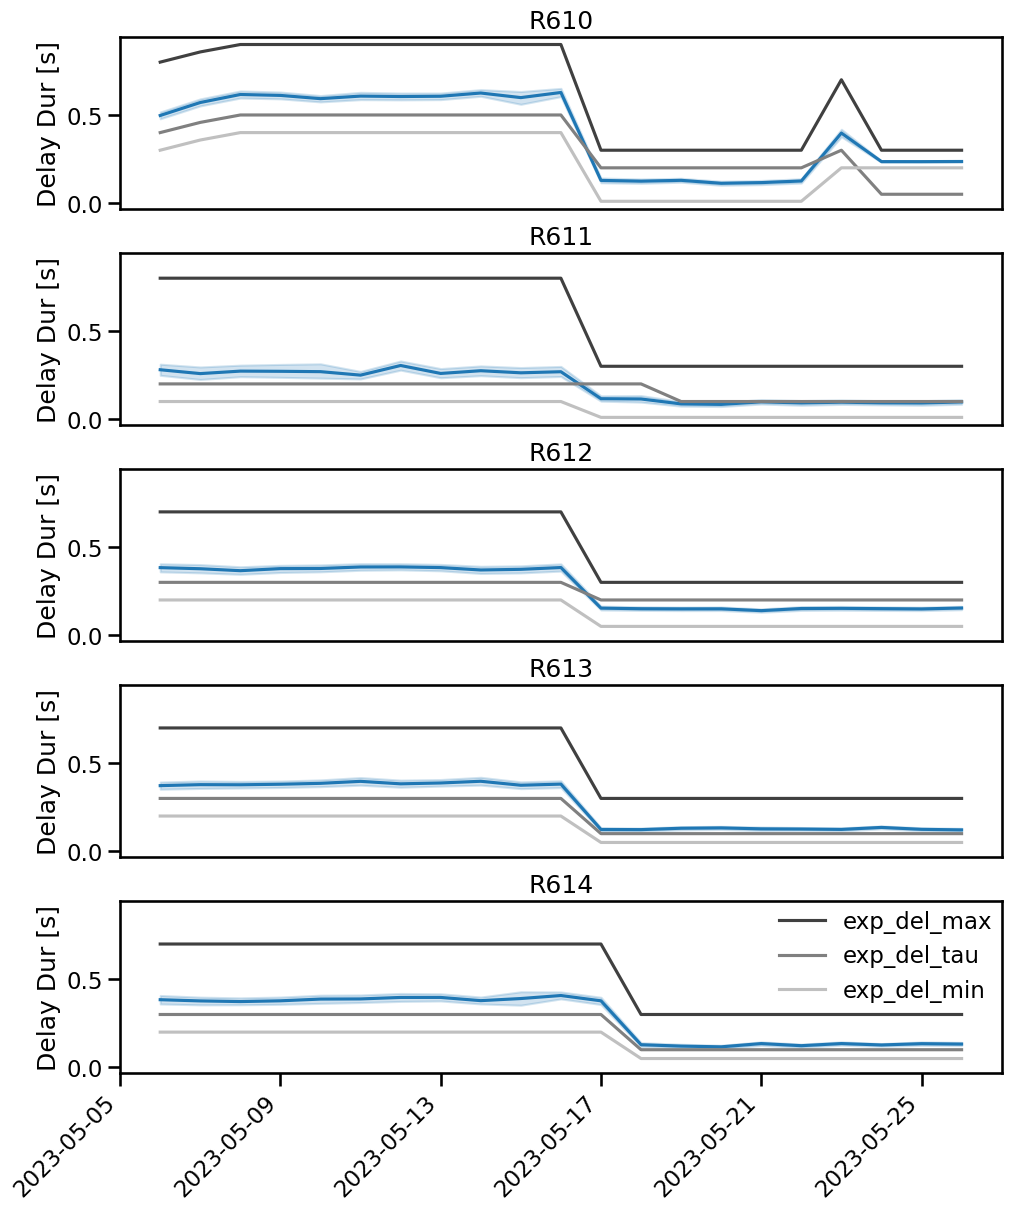

In [50]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True,sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df_20.groupby("animal_id")):
    legend = True if ii > 3 else False
    plot_multiday_delay_params(sub_df, ax[ii], title=animal_id, legend=legend)
    ax[ii].set_xticks([], []) if ii < 4 else None



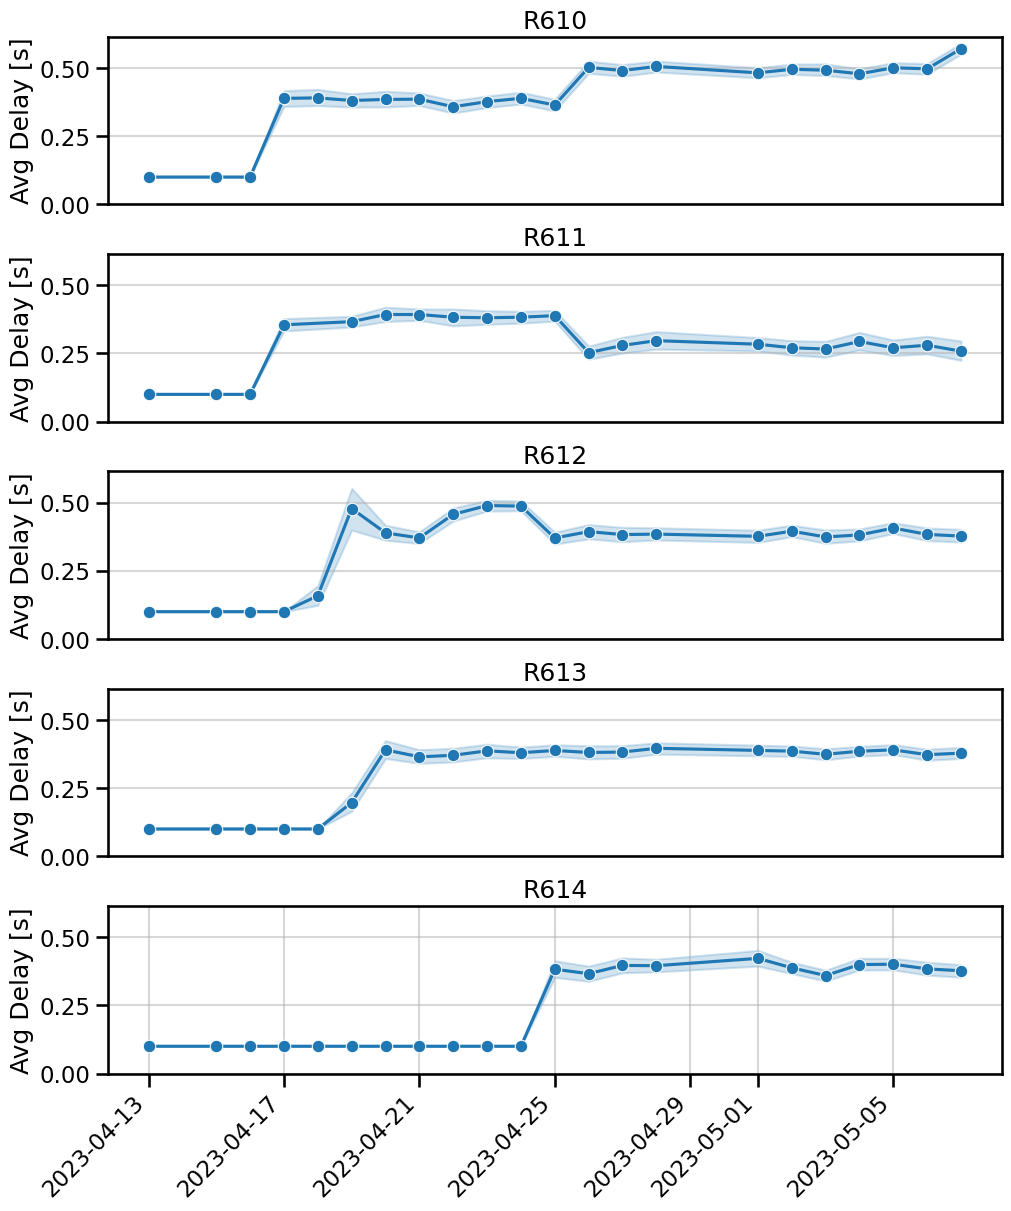

In [89]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True,sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df_may8.groupby("animal_id")):
    plot_multiday_avg_delay(sub_df, ax[ii], title=animal_id)
    ax[ii].set_xticks([], []) if ii < 4 else None



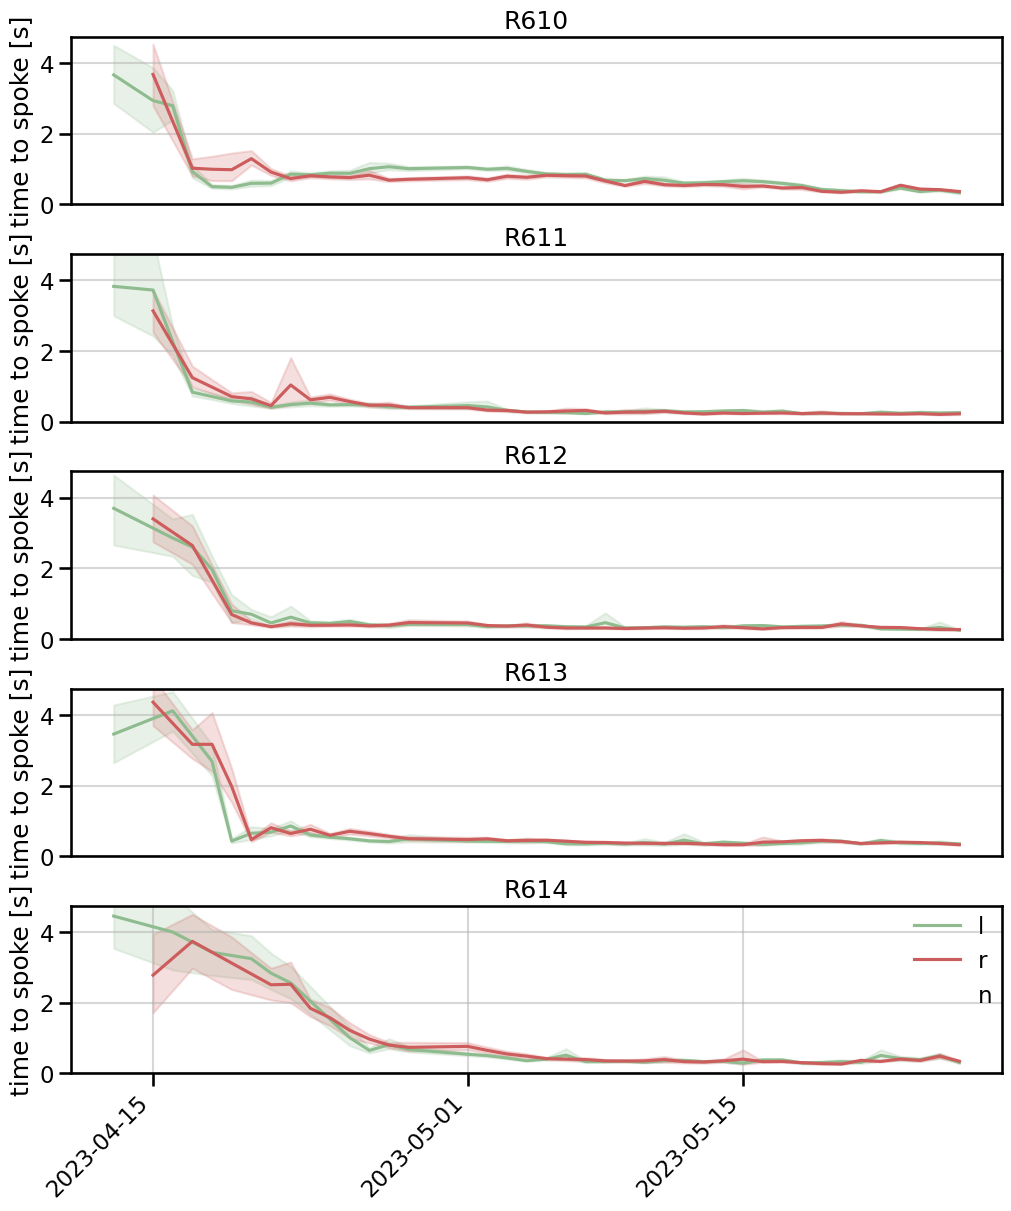

In [73]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True, sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df.groupby("animal_id")):
    legend = True if ii > 3 else False
    plot_multiday_time_to_spoke(sub_df, ax[ii], title=animal_id, legend=legend)
    ax[ii].set_xticks([], []) if ii < 4 else None

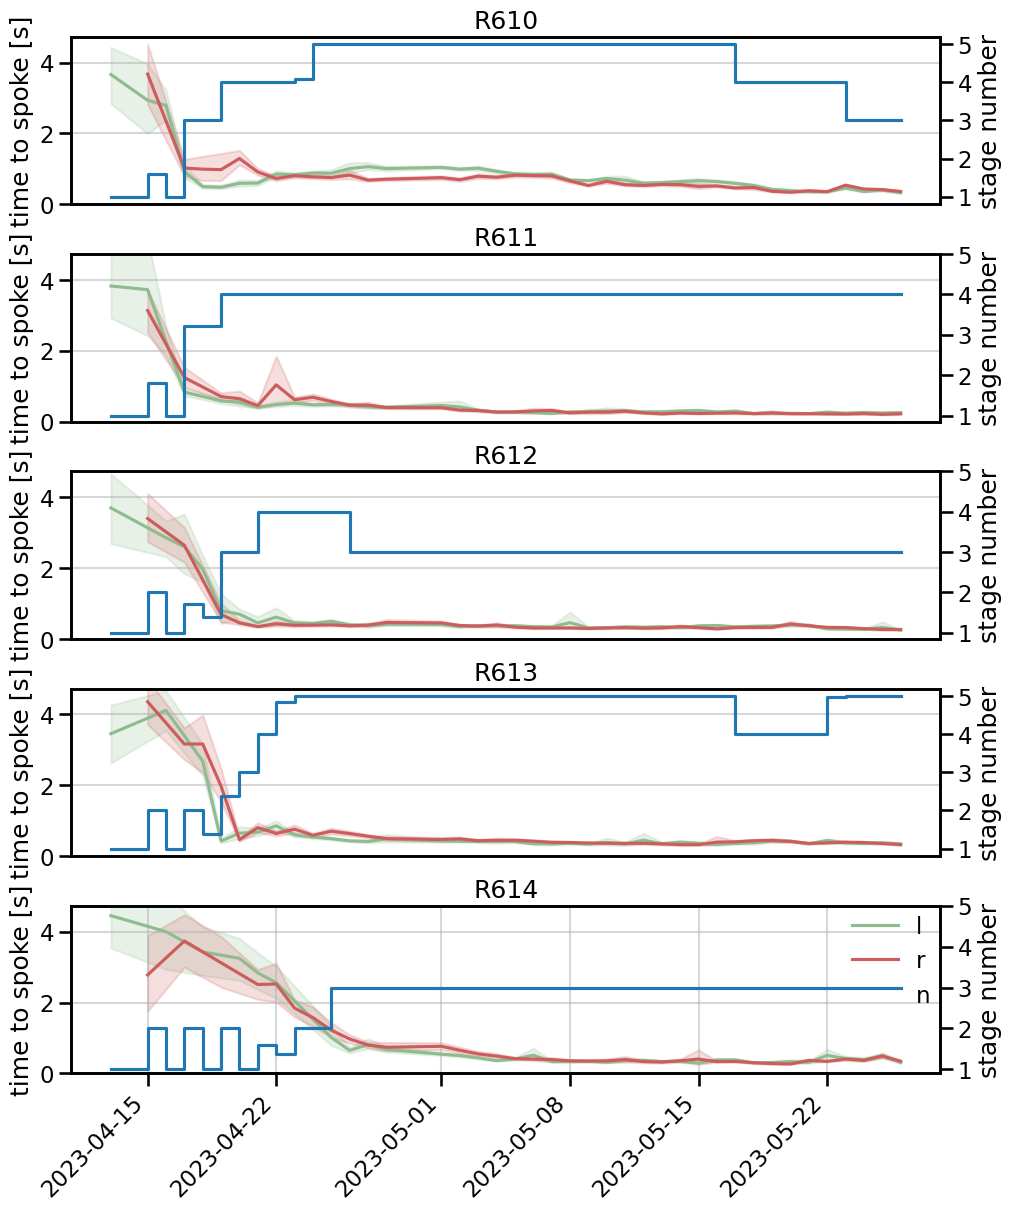

In [81]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True, sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df.groupby("animal_id")):
    legend = True if ii > 3 else False
    plot_multiday_time_to_spoke(sub_df, ax[ii], title=animal_id, legend=legend)
    ax[ii].set_xticks([], []) if ii < 4 else None
    ax2 = ax[ii].twinx()
    plot_stage(sub_df, ax2)



In [86]:
from datetime import date
comparison_date = date(2023, 5, 8) 
df_may8 = df.query('date < @comparison_date')

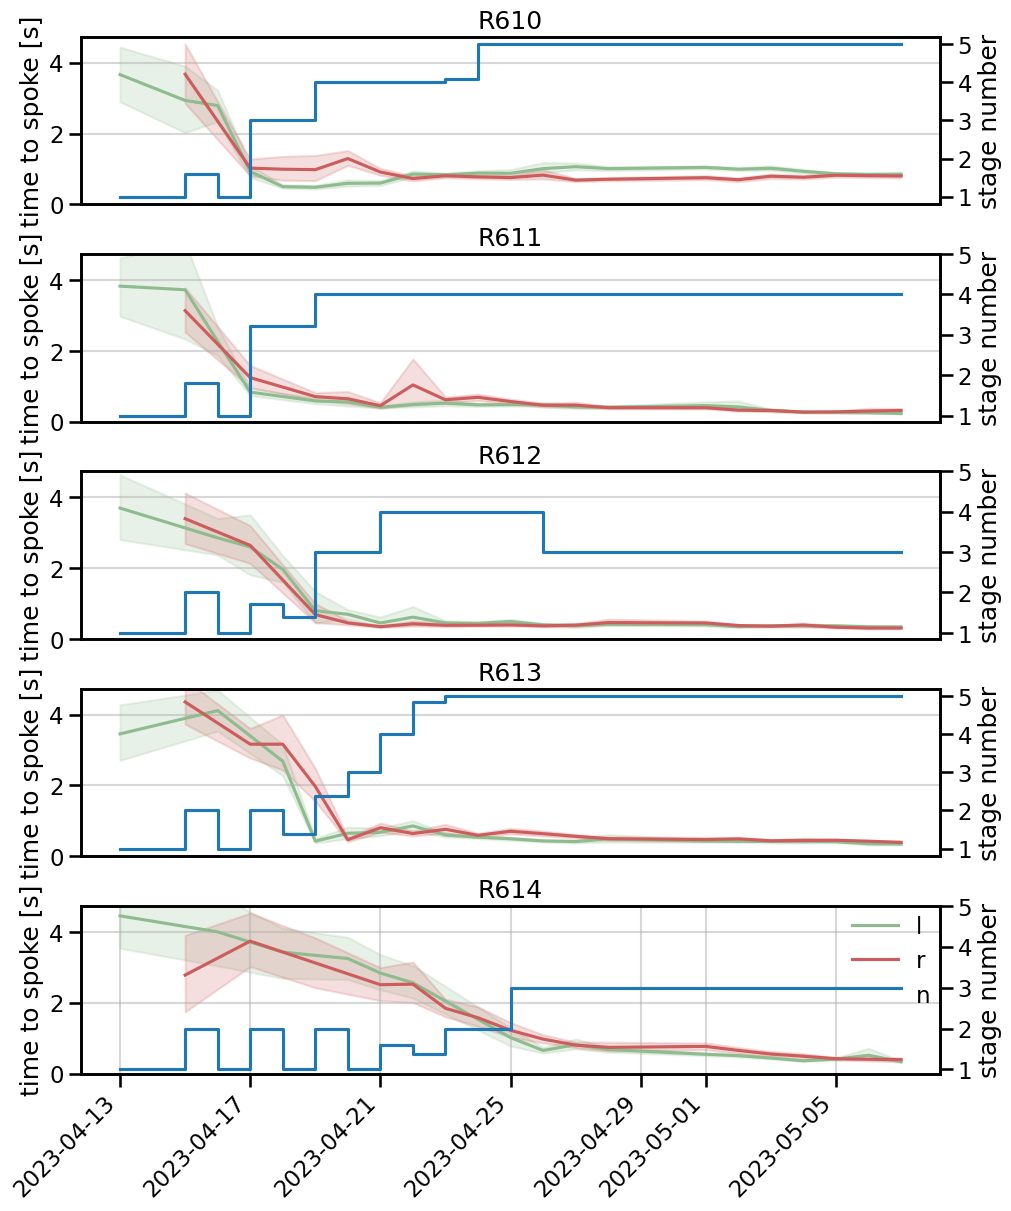

In [87]:
fig, ax = plt.subplots(5,1, figsize=(10,12), constrained_layout=True, sharex=False, sharey=True)
for ii, (animal_id, sub_df) in enumerate(df_may8.groupby("animal_id")):
    legend = True if ii > 3 else False
    plot_multiday_time_to_spoke(sub_df, ax[ii], title=animal_id, legend=legend)
    ax[ii].set_xticks([], []) if ii < 4 else None
    ax2 = ax[ii].twinx()
    plot_stage(sub_df, ax2)

